In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#The usual imports..

/home/charlierock/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_csv('./data/train.csv', parse_dates=['timestamp'])

In [3]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
df.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

In [5]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [6]:
all_cols = df.columns

In [7]:
all_cols

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

### Wow - 291 columns (plus one id column) This really is a deep dataset. I'm curious to dig in and see what I can find out. Let's see what ole Charlie can do.

In [8]:
for column in all_cols: print(column)

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
product_type
sub_area
area_m
raion_popul
green_zone_part
indust_part
children_preschool
preschool_quota
preschool_education_centers_raion
children_school
school_quota
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
full_all
male_f
female_f
young_all
young_male
young_female
work_all
work_male
work_female
ekder_all
ekder_male
ekder_female
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_all
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
raion_build_count_with_

In [9]:
y_train = df.price_doc

In [10]:
y_train.dtype

dtype('int64')

In [11]:
X_train = df.drop('price_doc', axis=1)

In [12]:
X_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,552,319,108,17,135,236,2,91,195,14


### The above two actions split the data set into an 'X' matrix and a 'y' column. the 'y' column is the sale price of the property. Next, I plan on applying some sort of feature selection using sklearn or something to narrow down these columns into something more manageable. 

### Argh, I should probably deal with missing data before performing any feaure selection tasks. I might as well start with a fully filled out dataset. 

In [13]:
NC_df = df.isnull().sum()

In [14]:
null_cols = []
for col in NC_df.keys():
    if NC_df[col] != 0:
        null_cols.append(col)

In [15]:
null_cols

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

### So, the above is a list of all the columns in the dataset that contain NaN values. I can examine this list to determine how best to fill those NaN values. For some of these columns, it could be a straight mean() or just a zero or a one. I'm going to use the tips in chapter 4 of Sebastian Raschka's _Python Machine Learning_ book. 

In [16]:
print(X_train['build_count_1946-1970'].mean())
print(X_train['build_count_1946-1970'].max())
print(X_train['build_count_1946-1970'].min())
print(X_train['build_count_1946-1970'].mode())
print(X_train['build_count_1946-1970'].median())

141.42641287284144
845.0
0.0
0    7.0
dtype: float64
135.0


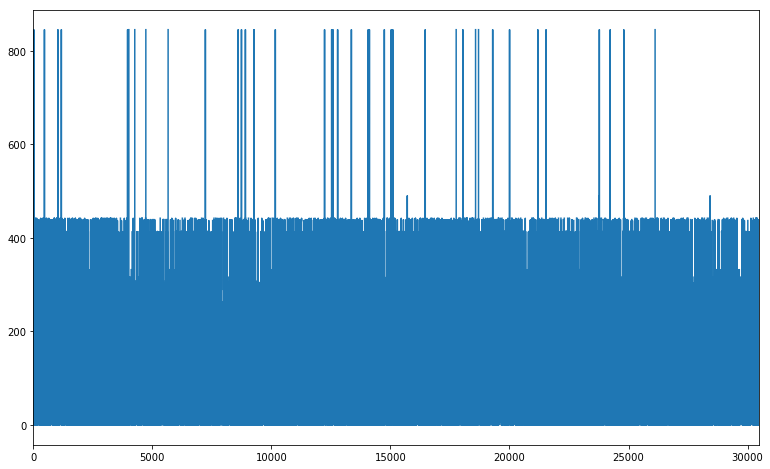

In [17]:
X_train['build_count_1946-1970'].plot(figsize=(13,8))

{'boxes': [<matplotlib.lines.Line2D at 0x7fb62844e9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb628481f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6284738d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb628478a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb62844e080>,
  <matplotlib.lines.Line2D at 0x7fb6284817f0>]}

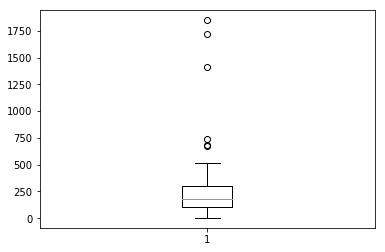

In [18]:
plt.boxplot(X_train['build_count_1946-1970'].value_counts())

In [19]:
X_train['build_count_1946-1970'].value_counts(ascending=True)

490.0       3
42.0        7
63.0       37
196.0      37
845.0      44
38.0       49
105.0      50
103.0      56
96.0       60
90.0       60
86.0       62
118.0      64
72.0       68
199.0      72
152.0      77
128.0      79
111.0      85
176.0      90
82.0       94
146.0      98
78.0       99
186.0     100
9.0       100
158.0     101
3.0       103
61.0      105
30.0      107
120.0     116
169.0     123
28.0      126
         ... 
298.0     259
144.0     266
32.0      268
165.0     282
221.0     295
442.0     300
316.0     305
46.0      308
60.0      317
143.0     333
125.0     351
304.0     366
156.0     372
193.0     382
95.0      410
203.0     411
278.0     421
246.0     421
99.0      436
2.0       443
413.0     446
439.0     451
153.0     452
184.0     518
154.0     678
40.0      679
14.0      741
1.0      1411
0.0      1717
7.0      1848
Name: build_count_1946-1970, Length: 100, dtype: int64

(array([ 2.,  2.,  4.,  6.,  5.,  8.,  6.,  5.,  7.,  6.,  9.,  6.,  2.,
         3.,  2.,  2.,  3.,  2.,  1.,  1.,  2.,  0.,  4.,  2.,  3.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    3.  ,    21.45,    39.9 ,    58.35,    76.8 ,    95.25,
          113.7 ,   132.15,   150.6 ,   169.05,   187.5 ,   205.95,
          224.4 ,   242.85,   261.3 ,   279.75,   298.2 ,   316.65,
          335.1 ,   353.55,   372.  ,   390.45,   408.9 ,   427.35,
          445.8 ,   464.25,   482.7 ,   501.15,   519.6 ,   538.05,
          556.5 ,   574.95,   593.4 ,   611.85,   630.3 ,   648.75,
          667.2 ,   685.65

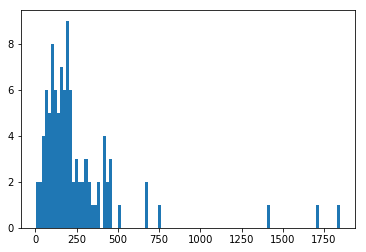

In [20]:
plt.hist(X_train['build_count_1946-1970'].value_counts(), bins=100)

### So, the above was an exploration of a random column - "build count 1946-1970". I don't know if I want to manually perform this for every column with missing data. That's a lot of work. My thought is to distill this excursion into something easily digestible and create a function with those items. Then, I can run through that function to find appropriate values to replace the NaN's. 

In [21]:
def find_impute(col):
    print('Column Mean is: %.2f' % col.mean())
    print('Column Median is: %.2f' % col.median())
    print('Column max value is: %.2f' % col.max())
    print('Column min value is: %.2f' % col.min())
    
    #Plotting the statistics charts
    fig, axes = plt.subplots(3,1, figsize = (10,12))
    axes[0].plot(col.index, col)
    axes[0].set_title('All Values')
    axes[1].hist(col.value_counts(), bins=50)
    axes[1].set_title('Histogram of Value Counts')
    axes[2].boxplot(col.value_counts())
    axes[2].set_title('Boxplot of Value Counts')

    fig.tight_layout()

Column Mean is: 141.43
Column Median is: 135.00
Column max value is: 845.00
Column min value is: 0.00


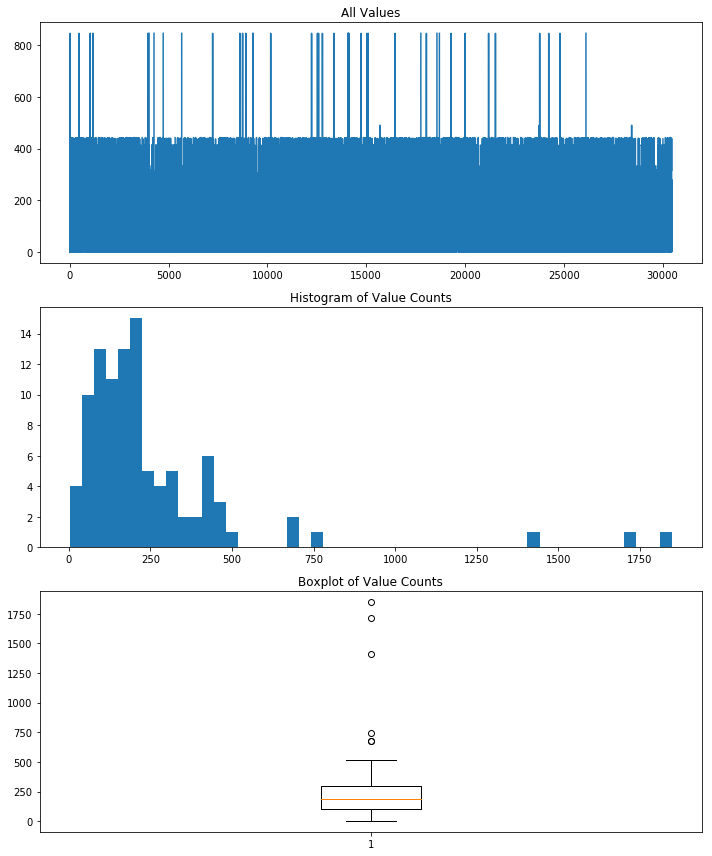

In [22]:
find_impute(X_train['build_count_1946-1970'])

### Well, the function works, except I don't think I'm creating my histogram and boxplots correctly. The values it's using aren't correct. I guess I got lucky with the randomly chosen first data column that I used to build the function. I'll have to dig deeper into what goes into histograms and boxplots. 

### Well, after some digging and some errors, it seems that my function doesn't work for all cases. However, in the interest of moving forward, I think I can go ahead and impute missing values with the average (mean) value. The dataset has enough rows to make this seem valid. I'm going to apply the method from Chapter 4 of Raschka's book _Python Machine Learning_ (edit: scratch that, the below method was discovered after some googling. It was way simpler and got the job done! Sometimes it's easier to do things the easy way, haha)

In [23]:
X_train[null_cols] = X_train[null_cols].apply(lambda x: x.fillna(x.mean()))
df[null_cols] = df[null_cols].apply(lambda x: x.fillna(x.mean()))

In [24]:
X_train.isnull().sum()

id                                       0
timestamp                                0
full_sq                                  0
life_sq                                  0
floor                                    0
max_floor                                0
material                                 0
build_year                               0
num_room                                 0
kitch_sq                                 0
state                                    0
product_type                             0
sub_area                                 0
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
children_preschool                       0
preschool_quota                          0
preschool_education_centers_raion        0
children_school                          0
school_quota                             0
school_education_centers_raion           0
school_educ

In [25]:
X_train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070
std,8796.501536,38.031487,46.487729,5.305390,5.595529,1.226638,1.148603e+05,0.705433,23.408855,0.655698,...,124.076662,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7620.500000,38.000000,22.000000,3.000000,9.000000,1.000000,1.976000e+03,1.909804,5.000000,2.000000,...,6.000000,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000
50%,15238.000000,49.000000,34.403271,7.000000,12.558974,1.827121,2.014000e+03,1.909804,6.399301,2.107025,...,24.000000,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000
75%,22855.500000,63.000000,38.000000,11.000000,16.000000,1.827121,3.068057e+03,2.000000,8.000000,2.107025,...,51.000000,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,641.000000,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000


In [26]:
X_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,552,319,108,17,135,236,2,91,195,14


### Well, now I'm ready to run through some feature selection and then try to fit a model to the data and test data. I'm glad I at least got the training data cleaned up. I learned quite a bit through this exercise, so the time spent was valuable. 

### I found an interesting blog post that may be relevant to this project. Since I'm planning on using XGBoost as my classifier, I was wondering whether it cares how many columns (features) are fed in. This dataset has a lot (291) of columns, so it could be useful to reduce the features that don't add much to the model in order to improve training time / computational cost. XGBoost not only automatically calculates feature importance, it also has a built-in plot function for feature importance. 

In [27]:
X_train.shape

(30471, 291)

In [28]:
y_train.shape

(30471,)

In [29]:
df_samp = df.sample(n=1500)
print(df_samp.shape)

(1500, 292)


In [30]:
#Split the y column from the sampled data
y_train_samp = df_samp.price_doc
#Set up some global variables for cleaning up the data
target = 'price_doc'
IDcol = 'id'
timestamp = 'timestamp'

In [31]:
df_samp = df_samp.drop('timestamp', axis=1)
print(df_samp.columns)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=291)


In [32]:
# Clear up the categorical variables and create dummy columns of the categorical variables
s = df_samp.dtypes
object_columns = s[s.values == 'object'].index.values

In [33]:
# Continue with cleaning up categorical stuff.
for i in object_columns:
    df_samp[i] = df_samp[i].astype('category')

In [34]:
# Create dummy variables for the categorical columns
df_samp = pd.get_dummies(df_samp)

In [35]:
df_samp.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
345,346,32,18.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,1,0,1,0,0,1,0,0,0
11368,11371,63,32.000000,11.0,23.000000,1.000000,2005.000000,2.000000,10.000000,3.000000,...,0,1,0,1,0,0,0,0,1,0
23704,23707,59,33.000000,11.0,17.000000,1.000000,1985.000000,2.000000,10.000000,3.000000,...,0,1,0,1,0,1,0,0,0,0
23697,23700,54,32.000000,14.0,17.000000,1.000000,1988.000000,2.000000,9.000000,2.107025,...,0,1,0,1,0,0,1,0,0,0
23691,23694,63,34.403271,6.0,17.000000,1.000000,3068.057097,2.000000,1.000000,2.107025,...,0,1,0,1,0,0,0,1,0,0


### From the error I'm about to list, I learned that XGBoost needs data to be numerical. I didn't realize that so many columns have non-numerical data. Below I will sort out the categorical data and create dummy columns to allow the data to be fed into xgboost. 

Error: ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields timestamp, product_type, sub_area, culture_objects_top_25, thermal_power_plant_raion, incineration_raion, oil_chemistry_raion, radiation_raion, railroad_terminal_raion, big_market_raion, nuclear_reactor_raion, detention_facility_raion, water_1line, big_road1_1line, railroad_1line, ecology

In [36]:
columns = df_samp.columns.values

In [37]:
columns.shape

(443,)

### Well, there are definitely way too many columns and records to do this efficiently on my macbook. I should sample into a smaller training set (maybe 1000 records?) and then try running this model. After that, I can scale it up and run the full model on my compute rig. Live and learn - Twitter "friends" to the rescue!

### So, pandas has a sample method that can randomly sample your dataset. I think I have to go back to the beginning though, and re-do the dataset handling from the get-go. I need to sample the data before splitting off the targets (y's). At this point, maybe I should incorporate some of the techniques that I have discovered while working on this. 

### Going to re-do the xgboost imports and model setup to use the plain python version versus the sklearn API. I think this will be more streamlined and work more smoothly, especially on the GPU machine. Let's see where this goes. 

In [38]:
#XGBoost and related imports
import xgboost as xgb
#from xgboost import XGBClassifier
#from xgboost import plot_importance
#from sklearn.metrics import r2_score
#from sklearn.model_selection import GridSearchCV #performing grid search
#from sklearn.model_selection import StratifiedKFold
import time

In [39]:
dtrain = df_samp
#dtrain = X_train  #Using the whole dataset after I get it going with a small sample. remember dummy vars

Train time: 0.16071319580078125 sec


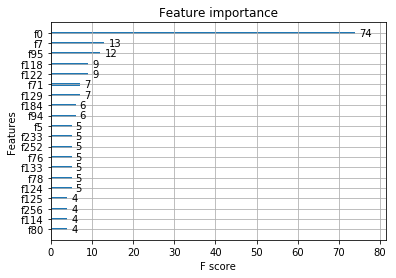

In [45]:
# Set up the parameter dictionary for xgboost
params = {}
params['eta'] = 0.1
params['objective'] = 'reg:linear'
params['max_depth'] = 5
params['min_child_weight'] = 1
params['gamma'] = 0
params['eval_metric'] = 'mae'
params['updater'] = 'grow_gpu'

predictors = [x for x in dtrain.columns if x not in [target, IDcol]]
#cv = StratifiedKFold(dtrain[target].values, n_folds=5)
num_round = 20
#for i, (train, test) in enumerate(cv):
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
tmp = time.time()
bst = xgb.train(params, xgtrain, num_round)
boost_time = time.time() - tmp
print('Train time: %s sec' % (str(boost_time)))
xgb.plot_importance(bst, max_num_features=20)
plt.show()

- with whole datset, impute missing values (done)
- take a sample of the whole dataset (done)
- split out the y values from the sample (done)
- clean up the X matrix sample (convert to categorical, then encode dummy columns) (done - 1194 columns?!)
- create model fitting function from Analytics Vidhya tutorial for XGBoost (done)
- Attempt to fit model to the sample and plot feature importances. (done - but can't read plot!)